# yTub37C mutant data
- This code generates the plots in Figure 3C, 3D, 3E, 3H, 3I, and 3J.
- The measurements were done in Imaris and recorded/calculated in excel.  
- Data was visualized using `seaborn` plots.
- There is a summary statistical test table at the end of the notebook. 

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure3'

In [3]:
ls

FIG3.ipynb      Fig3 data.xlsx  readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure3' # home directory
#figs_dir = home_dir + '/figs/' # directory to hold the figure output
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

In [5]:
# read in data
os.chdir(home_dir)
data = pd.read_excel('Fig3 data.xlsx', sheet_name = "Figure 3D, E, F, I, J, K ")

# Figures 3D-F, I-K

/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_45437/1473086916.py:14: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto', hue = 'genotype',


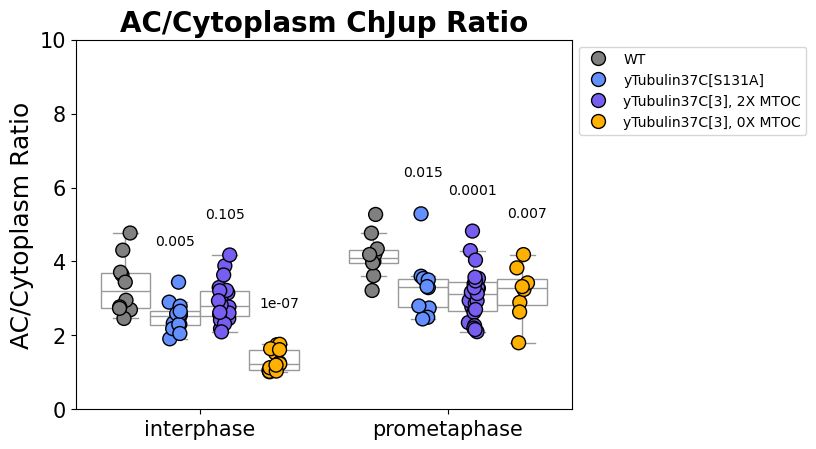

In [6]:
ho = ['WT', 'yTubulin37C[S131A]', 'yTubulin37C[3], 2X MTOC', 'yTubulin37C[3], 0X MTOC'] # sets hue order
po = ['interphase', 'prometaphase'] # sets phase order
p = ['grey', '#648FFF', '#785EF0', '#FFB000'] # blue, purple, magenta, orange, and yellow palette for color blindness
tick_size = 15 # axis tick size
axis_labels = 18 # axis label size
title_size = 20 # title size

# plotting
sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto', hue = 'genotype',
             hue_order = ho, order = po, palette = p,
              size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto', hue = 'genotype',
             hue_order = ho, order = po, palette = ['w','w','w'],
             dodge = True, legend = False)

plt.ylim(0,10)
plt.yticks(size = tick_size)
plt.xticks(size = tick_size)
plt.ylabel('AC/Cytoplasm Ratio', fontsize = axis_labels)
plt.xlabel('')
plt.title('AC/Cytoplasm ChJup Ratio', fontweight = 'bold', fontsize = title_size)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# AC/Cyto Stats

# Interphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (-0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='interphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='interphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"{a}", xy = (0.32, param2.max()+1), ha = 'center')


### ----------- ###

# Prometaphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='prometaphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (0.9, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='prometaphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 4)
plt.annotate(f"{a}", xy = (1.1, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='prometaphase')]['AC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (1.32, param2.max()+1), ha = 'center')

#os.chdir(figs_dir)

#plt.savefig('AC Cyto ratio.svg', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC Cyto ratio.png', dpi = 900, bbox_inches = 'tight')
plt.show();

/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_45437/642398506.py:14: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data = data, x = 'phase', y = 'BC/Cyto', hue = 'genotype',


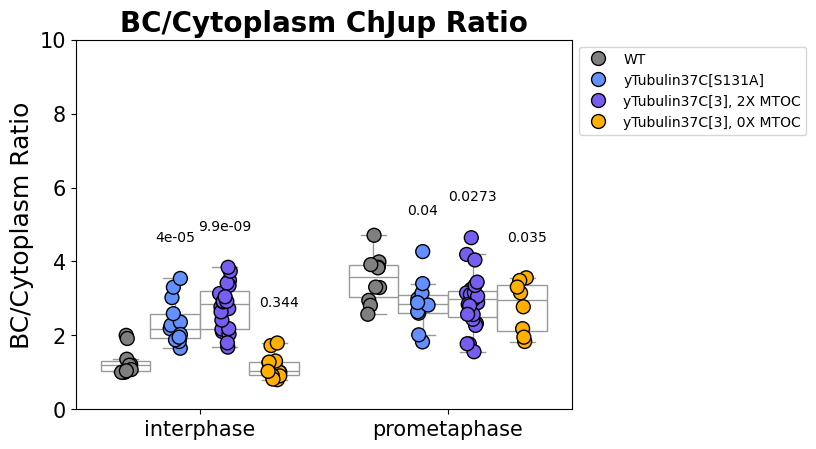

In [7]:
ho = ['WT', 'yTubulin37C[S131A]', 'yTubulin37C[3], 2X MTOC', 'yTubulin37C[3], 0X MTOC'] # sets hue order
po = ['interphase', 'prometaphase'] # sets phase order
p = ['grey', '#648FFF', '#785EF0', '#FFB000'] # blue, purple, magenta, orange, and yellow palette for color blindness
tick_size = 15 # axis tick size
axis_labels = 18 # axis label size
title_size = 20 # title size

# plotting
sns.stripplot(data = data, x = 'phase', y = 'BC/Cyto', hue = 'genotype',
             hue_order = ho, order = po, palette = p,
              size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'BC/Cyto', hue = 'genotype',
             hue_order = ho, order = po, palette = ['w','w','w'],
             dodge = True, legend = False)

plt.ylim(0,10)
plt.yticks(size = tick_size)
plt.xticks(size = tick_size)
plt.ylabel('BC/Cytoplasm Ratio', fontsize = axis_labels)
plt.xlabel('')
plt.title('BC/Cytoplasm ChJup Ratio', fontweight = 'bold', fontsize = title_size)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# BC/Cyto Stats

# Interphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 5)
plt.annotate(f"{a}", xy = (-0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='interphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"{a}", xy = (0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='interphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (0.32, param2.max()+1), ha = 'center')


### ----------- ###

# Prometaphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='prometaphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (0.9, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='prometaphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 4)
plt.annotate(f"{a}", xy = (1.1, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['BC/Cyto']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='prometaphase')]['BC/Cyto']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (1.32, param2.max()+1), ha = 'center')


#os.chdir(figs_dir)

#plt.savefig('BC Cyto ratio.svg', dpi = 900, bbox_inches = 'tight')
#plt.savefig('BC Cyto ratio.png', dpi = 900, bbox_inches = 'tight')
plt.show();


/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_45437/2446345996.py:14: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data = data, x = 'phase', y = 'AC/BC', hue = 'genotype',


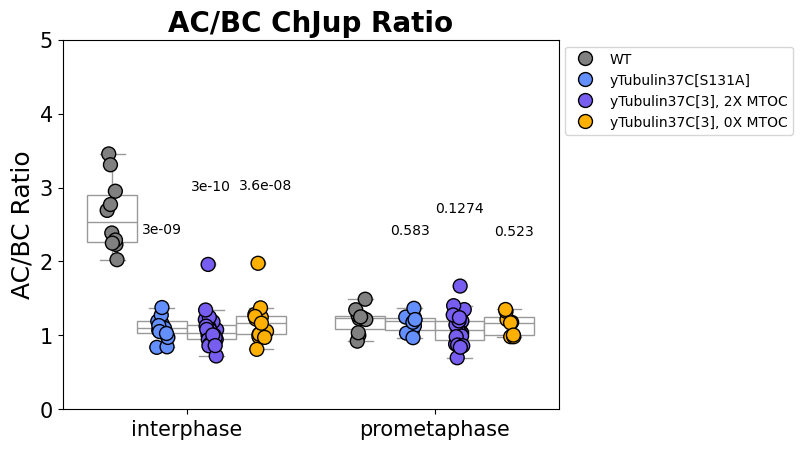

In [8]:
ho = ['WT', 'yTubulin37C[S131A]', 'yTubulin37C[3], 2X MTOC', 'yTubulin37C[3], 0X MTOC'] # sets hue order
po = ['interphase', 'prometaphase'] # sets phase order
p = ['grey', '#648FFF', '#785EF0', '#FFB000'] # blue, purple, magenta, orange, and yellow palette for color blindness
tick_size = 15 # axis tick size
axis_labels = 18 # axis label size
title_size = 20 # title size

# plotting
sns.stripplot(data = data, x = 'phase', y = 'AC/BC', hue = 'genotype',
             hue_order = ho, order = po, palette = p,
              size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC', hue = 'genotype',
             hue_order = ho, order = po, palette = ['w','w','w'],
             dodge = True, legend = False)

plt.ylim(0,5)
plt.yticks(size = tick_size)
plt.xticks(size = tick_size)
plt.ylabel('AC/BC Ratio', fontsize = axis_labels)
plt.xlabel('')
plt.title('AC/BC ChJup Ratio', fontweight = 'bold', fontsize = title_size)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# AC/BC Stats

# Interphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 9)
plt.annotate(f"{a}", xy = (-0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='interphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"{a}", xy = (0.1, param2.max()+1), ha = 'center')

# Interphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='interphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 9)
plt.annotate(f"{a}", xy = (0.32, param2.max()+1), ha = 'center')


### ----------- ###

# Prometaphase WT vs yTub37C[S131A]
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='prometaphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (0.9, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 2X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[3], 2X MTOC') & (data['phase']=='prometaphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 4)
plt.annotate(f"{a}", xy = (1.1, param2.max()+1), ha = 'center')

# Prometaphase WT vs yTub37C[3] 0X
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC']
param2 = data[(data['genotype']=='yTubulin37C[3], 0X MTOC') & (data['phase']=='prometaphase')]['AC/BC']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"{a}", xy = (1.32, param2.max()+1), ha = 'center')


#os.chdir(figs_dir)

#plt.savefig('AC BC ratio.svg', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC BC ratio.png', dpi = 900, bbox_inches = 'tight')
plt.show();


# Stats table

In [9]:
data.head(5)

,file name,genotype,Nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto,BC/Cyto,AC/BC
0,2023-05-22 BL7525 x BL4201_5_experimental brai...,"yTubulin37C[3], 2X MTOC",1.0,10.0,prometaphase,267.0,247.0,151.0,NaN,167.0,147.0,51.0,NaN,3.274510,2.882353,1.136054
1,NaN,"yTubulin37C[3], 2X MTOC",1.0,1.0,interphase,225.0,203.0,149.0,NaN,125.0,103.0,49.0,NaN,2.551020,2.102041,1.213592
2,NaN,"yTubulin37C[3], 2X MTOC",6.0,16.0,prometaphase,316.0,281.0,178.0,NaN,216.0,181.0,78.0,NaN,2.769231,2.320513,1.193370
3,NaN,"yTubulin37C[3], 2X MTOC",6.0,8.0,interphase,314.0,313.0,168.0,NaN,214.0,213.0,68.0,NaN,3.147059,3.132353,1.004695
4,NaN,"yTubulin37C[3], 2X MTOC",7.0,9.0,prometaphase,300.0,220.0,168.0,NaN,200.0,120.0,68.0,NaN,2.941176,1.764706,1.666667


In [10]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
# ho = ['WT', 'yTubulin37C[S131A]', 'yTubulin37C[3], 2X MTOC', 'yTubulin37C[3], 0X MTOC'] # sets hue order
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'AC/Cyto']
t2 = ['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'BC/Cyto']
t3 = ['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'AC/BC']

t4 = ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'AC/Cyto']
t5 = ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'BC/Cyto']
t6 = ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'AC/BC']

t7 = ['WT', 'yTubulin37C[S131A]', 'interphase', 'AC/Cyto']
t8 = ['WT', 'yTubulin37C[S131A]', 'interphase', 'BC/Cyto']
t9 = ['WT', 'yTubulin37C[S131A]', 'interphase', 'AC/BC']

tests = [t1, t2, t3, t4, t5, t6, t7, t8, t9]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"yTubulin37C[3], 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto,10,20,3.35E+00,2.89E+00,7.64E-01,5.58E-01,1.86E+00,28,N/A,7.27256e-02,ns
1,WT,"yTubulin37C[3], 2X MTOC",interphase,Mann-Whitney U Test,BC/Cyto,10,20,1.30E+00,2.76E+00,3.65E-01,6.32E-01,4.00E+00,N/A,N/A,2.64676e-05,****
2,WT,"yTubulin37C[3], 2X MTOC",interphase,Mann-Whitney U Test,AC/BC,10,20,2.63E+00,1.08E+00,4.85E-01,2.55E-01,2.00E+02,N/A,N/A,1.20094e-05,****
3,WT,"yTubulin37C[3], 0X MTOC",interphase,Mann-Whitney U Test,AC/Cyto,10,13,3.35E+00,1.32E+00,7.64E-01,2.89E-01,1.30E+02,N/A,N/A,6.33103e-05,****
4,WT,"yTubulin37C[3], 0X MTOC",interphase,Mann-Whitney U Test,BC/Cyto,10,13,1.30E+00,1.16E+00,3.65E-01,3.18E-01,8.20E+01,N/A,N/A,3.04975e-01,ns
5,WT,"yTubulin37C[3], 0X MTOC",interphase,Mann-Whitney U Test,AC/BC,10,13,2.63E+00,1.18E+00,4.85E-01,2.86E-01,1.30E+02,N/A,N/A,6.33103e-05,****
6,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,AC/Cyto,10,13,3.35E+00,2.50E+00,7.64E-01,4.01E-01,1.12E+02,N/A,N/A,3.55077e-03,**
7,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,BC/Cyto,10,13,1.30E+00,2.35E+00,3.65E-01,5.98E-01,8.00E+00,N/A,N/A,4.56869e-04,***
8,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,AC/BC,10,13,2.63E+00,1.09E+00,4.85E-01,1.55E-01,1.30E+02,N/A,N/A,6.33103e-05,****


# Redoing Stats to be Kruskal-Wallis tests with Dunn's post-hoc test. 

In [12]:
# read in data
os.chdir(home_dir)
data = pd.read_excel('Fig3 data.xlsx', sheet_name = "Figure 3D, E, F, I, J, K ")
data.head(5)

,file name,genotype,Nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto,BC/Cyto,AC/BC
0,2023-05-22 BL7525 x BL4201_5_experimental brai...,"yTubulin37C[3], 2X MTOC",1.00E+00,1.00E+01,prometaphase,2.67E+02,2.47E+02,1.51E+02,NaN,1.67E+02,1.47E+02,5.10E+01,NaN,3.27E+00,2.88E+00,1.14E+00
1,NaN,"yTubulin37C[3], 2X MTOC",1.00E+00,1.00E+00,interphase,2.25E+02,2.03E+02,1.49E+02,NaN,1.25E+02,1.03E+02,4.90E+01,NaN,2.55E+00,2.10E+00,1.21E+00
2,NaN,"yTubulin37C[3], 2X MTOC",6.00E+00,1.60E+01,prometaphase,3.16E+02,2.81E+02,1.78E+02,NaN,2.16E+02,1.81E+02,7.80E+01,NaN,2.77E+00,2.32E+00,1.19E+00
3,NaN,"yTubulin37C[3], 2X MTOC",6.00E+00,8.00E+00,interphase,3.14E+02,3.13E+02,1.68E+02,NaN,2.14E+02,2.13E+02,6.80E+01,NaN,3.15E+00,3.13E+00,1.00E+00
4,NaN,"yTubulin37C[3], 2X MTOC",7.00E+00,9.00E+00,prometaphase,3.00E+02,2.20E+02,1.68E+02,NaN,2.00E+02,1.20E+02,6.80E+01,NaN,2.94E+00,1.76E+00,1.67E+00


In [13]:
import pandas as pd
from scipy.stats import kruskal  # Use correct import

# Define test parameters
phases = ['interphase']  # List of phases to test
y_values = ['AC/Cyto', 'BC/Cyto', 'AC/BC']  # List of y-values to test
genotypes = ['WT', 'yTubulin37C[3], 2X MTOC', 'yTubulin37C[3], 0X MTOC']  # Genotypes to compare

# Create an empty list to store results
results = []

# Iterate through each phase and y-value
for phase in phases:
    for y_value in y_values:
        # Extract data for each genotype
        group_data = [data[(data['genotype'] == genotype) & (data['phase'] == phase)][y_value].dropna().tolist() for genotype in genotypes]
        
        # Ensure at least two groups have data
        if sum(len(g) > 0 for g in group_data) > 1:
            # Perform Kruskal-Wallis test
            kw_stat, p_value = kruskal(*group_data)

            # Determine significance
            if p_value < 0.0001:
                sig = "****"
            elif p_value < 0.001:
                sig = "***"
            elif p_value < 0.01:
                sig = "**"
            elif p_value < 0.05:
                sig = "*"
            else:
                sig = "ns"

            # Append results as a dictionary
            results.append({
                'phase': phase,
                'y-value': y_value,
                'H-statistic': kw_stat,
                'p-value': p_value,
                'significance': sig
            })

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df
results_df.to_csv('kw-tests.csv')

,phase,y-value,H-statistic,p-value,significance
0,interphase,AC/Cyto,2.80E+01,8.16E-07,****
1,interphase,BC/Cyto,3.02E+01,2.84E-07,****
2,interphase,AC/BC,2.37E+01,7.05E-06,****


In [14]:
import pandas as pd
import numpy as np
from scikit_posthocs import posthoc_dunn

tests = [['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'AC/Cyto'],
         ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'AC/Cyto'],
         ['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'BC/Cyto'],
         ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'BC/Cyto'],
         ['WT', 'yTubulin37C[3], 2X MTOC', 'interphase', 'AC/BC'],
         ['WT', 'yTubulin37C[3], 0X MTOC', 'interphase', 'AC/BC']
        ]

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Create a DataFrame for Dunn's test
    df = pd.DataFrame({
        'values': np.concatenate([param1, param2]),
        'groups': ['control'] * len(param1) + ['experimental'] * len(param2)
    })

    # Perform Dunn's test (no p-value correction)
    dunn_results = posthoc_dunn(df, val_col='values', group_col='groups', p_adjust=None)

    # Extract p-value
    p_value = dunn_results.loc['control', 'experimental']

    stats_table.loc[i, 'test'] = "Dunn’s Test (No Correction)"
    stats_table.loc[i, 'test statistic'] = "N/A"  # Dunn's test does not return a direct test statistic
    stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for Dunn’s test
    stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for Dunn’s test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
stats_table.to_csv('Fig3 Dunn test.csv')

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"yTubulin37C[3], 2X MTOC",interphase,Dunn’s Test (No Correction),AC/Cyto,10,20,3.35E+00,2.89E+00,7.64E-01,5.58E-01,N/A,N/A,N/A,8.62039e-02,ns
1,WT,"yTubulin37C[3], 0X MTOC",interphase,Dunn’s Test (No Correction),AC/Cyto,10,13,3.35E+00,1.32E+00,7.64E-01,2.89E-01,N/A,N/A,N/A,5.55096e-05,****
2,WT,"yTubulin37C[3], 2X MTOC",interphase,Dunn’s Test (No Correction),BC/Cyto,10,20,1.30E+00,2.76E+00,3.65E-01,6.32E-01,N/A,N/A,N/A,2.40103e-05,****
3,WT,"yTubulin37C[3], 0X MTOC",interphase,Dunn’s Test (No Correction),BC/Cyto,10,13,1.30E+00,1.16E+00,3.65E-01,3.18E-01,N/A,N/A,N/A,2.90553e-01,ns
4,WT,"yTubulin37C[3], 2X MTOC",interphase,Dunn’s Test (No Correction),AC/BC,10,20,2.63E+00,1.08E+00,4.85E-01,2.55E-01,N/A,N/A,N/A,1.08544e-05,****
5,WT,"yTubulin37C[3], 0X MTOC",interphase,Dunn’s Test (No Correction),AC/BC,10,13,2.63E+00,1.18E+00,4.85E-01,2.86E-01,N/A,N/A,N/A,5.55096e-05,****
6,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,AC/Cyto,10,13,3.35E+00,2.50E+00,7.64E-01,4.01E-01,1.12E+02,N/A,N/A,3.55077e-03,**
7,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,BC/Cyto,10,13,1.30E+00,2.35E+00,3.65E-01,5.98E-01,8.00E+00,N/A,N/A,4.56869e-04,***
8,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,AC/BC,10,13,2.63E+00,1.09E+00,4.85E-01,1.55E-01,1.30E+02,N/A,N/A,6.33103e-05,****
